In [49]:
#Importing all necessary libaries and loading dataset file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('shuffled_new.csv')


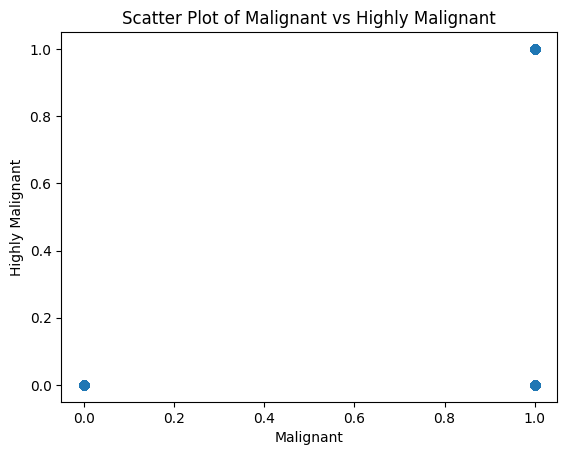

In [50]:
#A1
x=df['malignant']
y=df['highly_malignant']
plt.scatter(x,y)
plt.xlabel('Malignant')
plt.ylabel('Highly Malignant')
plt.title('Scatter Plot of Malignant vs Highly Malignant')
plt.show()

In [51]:
#A2
x=df['malignant'].values.reshape(-1,1)
y=df['highly_malignant'].values.reshape(-1,1)
train_size=int(len(x) * 0.7)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.05392358919477622


In [52]:
#A3
print('Coefficients:',model.coef_)
print('Intercept:',model.intercept_)
print('R^2:',model.score(x,y))
x_new=np.array([[1],[2],[3]])
y_new=model.predict(x_new)
print('Predicted Values:',y_new)

Coefficients: [[0.10137566]]
Intercept: [-2.08166817e-16]
R^2: 0.047946632712100756
Predicted Values: [[0.10137566]
 [0.20275132]
 [0.30412698]]


In [53]:
#A4
df['YES/NO']=df['YES/NO'].apply(lambda x: 1 if x == 'YES' else 0)
X=df['comment_text']
y=df['YES/NO']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
tfidf_vectorizer=TfidfVectorizer(max_features=1000)
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)
logistic_regression_model=LogisticRegression()
logistic_regression_model.fit(X_train_tfidf,y_train)
y_pred=logistic_regression_model.predict(X_test_tfidf)
accuracy=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8626328699918234
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1085
           1       0.88      0.87      0.88      1361

    accuracy                           0.86      2446
   macro avg       0.86      0.86      0.86      2446
weighted avg       0.86      0.86      0.86      2446



In [54]:
#A5
le=LabelEncoder()
df['YES/NO']=le.fit_transform(df['YES/NO'])
X_reg=df[['malignant','highly_malignant','rude','threat','abuse','loathe']]
y_reg=df['YES/NO']
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)
regression_tree_model=DecisionTreeRegressor()
regression_tree_model.fit(X_train_reg,y_train_reg)
y_pred_tree=regression_tree_model.predict(X_test_reg)
mae_tree=mean_absolute_error(y_test_reg,y_pred_tree)
mse_tree=mean_squared_error(y_test_reg,y_pred_tree)
r2_tree=r2_score(y_test_reg,y_pred_tree)
print(f"Regression Tree-Mean Absolute Error:{mae_tree}")
print(f"Regression Tree-Mean Squared Error:{mse_tree}")
print(f"Regression Tree-R-squared:{r2_tree}")
knn_regressor_model=KNeighborsRegressor(n_neighbors=5)
knn_regressor_model.fit(X_train_reg,y_train_reg)
y_pred_knn=knn_regressor_model.predict(X_test_reg)
mae_knn=mean_absolute_error(y_test_reg,y_pred_knn)
mse_knn=mean_squared_error(y_test_reg,y_pred_knn)
r2_knn=r2_score(y_test_reg,y_pred_knn)
print(f"k-NN Regressor-Mean Absolute Error:{mae_knn}")
print(f"k-NN Regressor-Mean Squared Error:{mse_knn}")
print(f"k-NN Regressor-R-squared:{r2_knn}")

Regression Tree-Mean Absolute Error:0.0
Regression Tree-Mean Squared Error:0.0
Regression Tree-R-squared:1.0
k-NN Regressor-Mean Absolute Error:0.0
k-NN Regressor-Mean Squared Error:0.0
k-NN Regressor-R-squared:1.0
